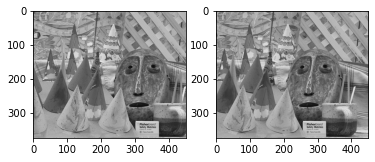

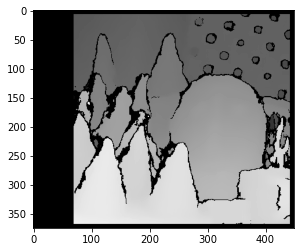

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
imgL = cv.imread('left.png',0)
imgR = cv.imread('right.png',0)
stereo = cv.StereoBM_create(numDisparities=64, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.subplot(121)
plt.imshow(imgL,'gray')
plt.subplot(122)
plt.imshow(imgR,'gray')
plt.show()
plt.imshow(disparity,'gray')
plt.show()


In [43]:
imgL.shape

(375, 450)

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

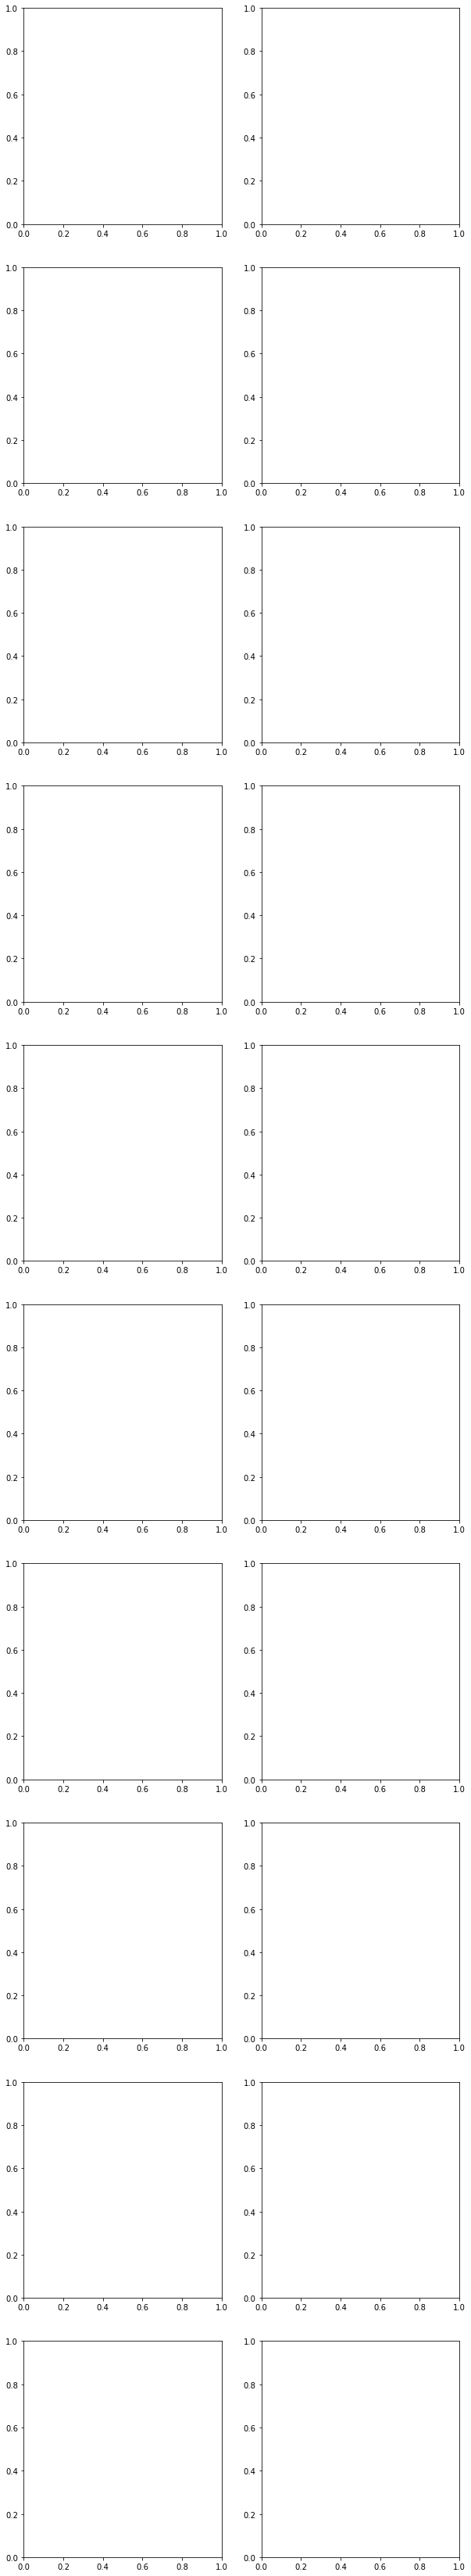

In [69]:
iterats = 10
fig , axs = plt.subplots(iterats,2,figsize=(10, 60))
for i in range(iterats):
    nD = 16*(i+1) # numDisparities
    bs = 5+2*(i+1) # block size 
    stereo = cv.StereoBM_create(numDisparities=nD, blockSize=bs)
    disparity = stereo.compute(imgL,imgR)
    axs[i].set_title("numDisparities="+str(nD)+", blockSize="+str(bs))
    axs[i].imshow(disparity,'gray')
plt.show()
